# Predictive modeling of liver patients using classification algorithms

The objective of the project is to build predictive model that will describe whether the patient is suffering from lever disease or not. The dataset contains the details of the patient like age, gender, blood tests which provide the details of Bilirubin, Protein, Sgpt, etc. In the project various hypothesis tests were accomplished to find the answer of question like 
does age or gender effects the liver of patients. What are the significant attributes to decide whether is patient possess
liver related ailments or not. 



Detials of the dataset


Age Age of the patient

Gender Gender of the patient

TB Total Bilirubin

DB Direct Bilirubin

Alkphos Alkaline Phosphotase

Sgpt Alamine Aminotransferase

Sgot Aspartate Aminotransferase

TP Total Protiens

ALB Albumin

A/G Ratio Albumin and Globulin Ratio

Selector field used to split the data into two sets (labeled by the experts) 1 Liver Patient, 2 non Liver Patient

Importing Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report


from scipy import stats

from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import SCORERS

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

C:\Users\rishw\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


The objective of the project to build predictive model that will describe whether the patient is suffering from lever disease or not. The dataset contains the details of the patient like age, gender, blood test which provides the details of Bilirubin, Protein, Sgpt, etc. In the project various hypothesis tests were accomplished to find the answer of question like 
does age or gender effects the liver of patients. What are the significant attributes to decide whether is patient possess
liver related ailments or not. 


In [187]:
data = pd.read_csv('Liver Patient Dataset (LPD)_train.csv/Liver Patient Dataset (LPD)_train.csv',encoding='iso-8859-1')
data.head() # have glimpse of the dataset

Age of the patient Gender of the patient  Total Bilirubin  \
0                65.0                Female              0.7   
1                62.0                  Male             10.9   
2                62.0                  Male              7.3   
3                58.0                  Male              1.0   
4                72.0                  Male              3.9   

   Direct Bilirubin   Alkphos Alkaline Phosphotase  \
0               0.1                          187.0   
1               5.5                          699.0   
2               4.1                          490.0   
3               0.4                          182.0   
4               2.0                          195.0   

    Sgpt Alamine Aminotransferase  Sgot Aspartate Aminotransferase  \
0                            16.0                             18.0   
1                            64.0                            100.0   
2                            60.0                             68.0   
3                            14.0                             20.0   
4                            27.0                             59.0   

   Total Protiens   ALB Albumin  A/G Ratio Albumin and Globulin Ratio  Result  
0             6.8           3.3                                  0.90       1  
1             7.5           3.2                                  0.74       1  
2             7.0           3.3                                  0.89       1  
3             6.8           3.4                                  1.00       1  
4             7.3           2.4                                  0.40       1

In [188]:
new_col_list=[] # code to remove trailing spaces from the dataset
for col in data.columns:
    new_col_list.append(str.strip(col))
data.columns = new_col_list  # removing trailing spaces from the column

In [194]:
data.describe() # five point summary

Age of the patient  Total Bilirubin  Direct Bilirubin  \
count        19367.000000     18811.000000      18878.000000   
mean            43.809986         3.315767          1.515637   
std             16.454988         6.111851          2.863609   
min              4.000000         0.400000          0.100000   
25%             32.000000         0.800000          0.200000   
50%             45.000000         1.000000          0.300000   
75%             55.000000         2.600000          1.300000   
max             90.000000        75.000000         19.700000   

       Alkphos Alkaline Phosphotase  Sgpt Alamine Aminotransferase  \
count                  18674.000000                   18909.000000   
mean                     289.407411                      80.598762   
std                      239.727272                     181.134634   
min                       63.000000                      10.000000   
25%                      175.000000                      23.000000   
50%                      208.000000                      35.000000   
75%                      298.000000                      61.000000   
max                     2110.000000                    2000.000000   

       Sgot Aspartate Aminotransferase  Total Protiens   ALB Albumin  \
count                     18975.000000    18998.000000  18955.000000   
mean                        110.790672        6.494326      3.141045   
std                         278.927937        1.089985      0.793602   
min                          10.000000        2.700000      0.900000   
25%                          25.000000        5.800000      2.600000   
50%                          42.000000        6.600000      3.100000   
75%                          88.000000        7.200000      3.800000   
max                        4929.000000        9.600000      5.500000   

       A/G Ratio Albumin and Globulin Ratio        Result  
count                          18932.000000  19368.000000  
mean                               0.945888      1.286917  
std                                0.322023      0.452334  
min                                0.300000      1.000000  
25%                                0.700000      1.000000  
50%                                0.930000      1.000000  
75%                                1.100000      2.000000  
max                                2.800000      2.000000

In [189]:
print("Percentge of null values")
data.isnull().sum()/len(data)*100 # data set contains null values

Percentge of null values


Age of the patient                      0.006517
Gender of the patient                   2.938972
Total Bilirubin                         2.111368
Direct Bilirubin                        1.827897
Alkphos Alkaline Phosphotase            2.593594
Sgpt Alamine Aminotransferase           1.752957
Sgot Aspartate Aminotransferase         1.505327
Total Protiens                          1.508586
ALB Albumin                             1.609592
A/G Ratio Albumin and Globulin Ratio    1.821381
Result                                  0.000000
dtype: float64

In [9]:
data.duplicated().sum() # the data set also contains duplicated values

11323

In [191]:
data = data.drop_duplicates() # removes the duplicated values

In [196]:
data.shape

(19368, 11)

Null vaues are not present in the taget variables, however these are there are present in all independent variables with less than around
4 percentage

In [201]:
# function to replace the null of numeric data with 
def FillNull(df): # take data frame as argument, return nothing
    for col in df:
        if df[col].dtypes=='O':  # if data type is string, replace null values with most frequent value
            df[col] = df[col].fillna(value = df[col].mode()[0])
        elif (df[col].dtypes==float) or (df[col].dtypes ==int):  # if data type is integer replace null values with mediant
            df[col] = df[col].fillna(value = df[col].median()) 
        else: # it means there is other data type than numerical or categorical 
            continue
FillNull(data)

In [202]:
FillNull(data)

In [203]:
data.dtypes

Age of the patient                      float64
Gender of the patient                    object
Total Bilirubin                         float64
Direct Bilirubin                        float64
Alkphos Alkaline Phosphotase            float64
Sgpt Alamine Aminotransferase           float64
Sgot Aspartate Aminotransferase         float64
Total Protiens                          float64
ALB Albumin                             float64
A/G Ratio Albumin and Globulin Ratio    float64
Result                                    int64
dtype: object

In [204]:
data.isnull().sum() # all values are dealt

Age of the patient                      0
Gender of the patient                   0
Total Bilirubin                         0
Direct Bilirubin                        0
Alkphos Alkaline Phosphotase            0
Sgpt Alamine Aminotransferase           0
Sgot Aspartate Aminotransferase         0
Total Protiens                          0
ALB Albumin                             0
A/G Ratio Albumin and Globulin Ratio    0
Result                                  0
dtype: int64

Box plot to check the distribution and outliers


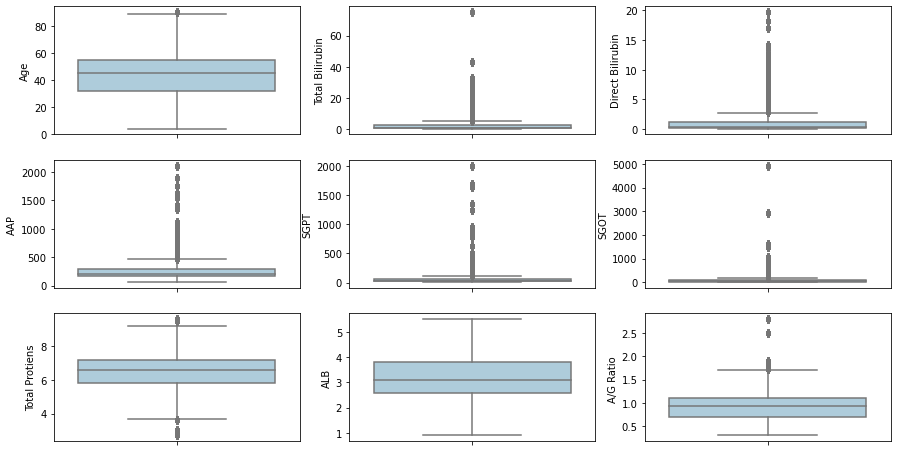

In [205]:
print("Box plot to check the distribution and outliers")
fig ,axes = plt.subplots(3,3,figsize=(15,8),sharex=False)
a1=sns.boxplot(ax=axes[0][0],y = data['Age of the patient'])
a1.set(ylabel='Age')
a2 =sns.boxplot(ax=axes[0][1],y = data['Total Bilirubin'])
a2.set(ylabel='Total Bilirubin')
a3=sns.boxplot(ax=axes[0][2],y = data['Direct Bilirubin'])
a3.set(ylabel='Direct Bilirubin')
a4=sns.boxplot(ax=axes[1][0],y = data['Alkphos Alkaline Phosphotase'])
a4.set(ylabel='AAP')
a5=sns.boxplot(ax=axes[1][1],y = data['Sgpt Alamine Aminotransferase'])
a5.set(ylabel='SGPT')
a6=sns.boxplot(ax=axes[1][2],y = data['Sgot Aspartate Aminotransferase'])
a6.set(ylabel='SGOT')
a7=sns.boxplot(ax=axes[2][0],y = data['Total Protiens'])
a7.set(ylabel='Total Protiens')
a8=sns.boxplot(ax=axes[2][1],y = data['ALB Albumin'])
a8.set(ylabel='ALB')
a9=sns.boxplot(ax=axes[2][2],y = data['A/G Ratio Albumin and Globulin Ratio'])
a9.set(ylabel='A/G Ratio ')
plt.show()

The outliers are present in the data, although Albuin and age apear to follow normal distribution

Since the data does not appear to follow normal distribution, it can be said that parametric algorithms least likely to perform
well on the dataset

In [20]:
# checkig class percentage
data['Result'].value_counts()/len(data)*100

1    71.308344
2    28.691656
Name: Result, dtype: float64

From above data it is clear that 1 class possess high percentage than class2, in other word liver patients dominate in the 
data compare to non liver patients

# Checking whether age effects liver disease

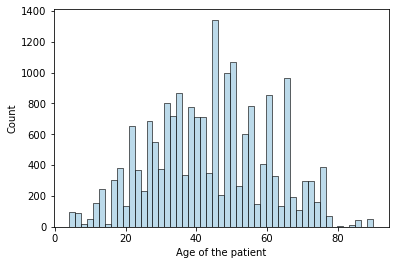

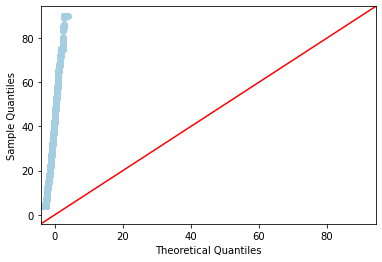

In [207]:
sns.histplot(data['Age of the patient'])
plt.show()
sm.qqplot(data['Age of the patient'],line='45')
plt.show()

From above grapha it is clear that age does not follow normal distribution

Let's verify above statements with shapiro and jarquera test

In [22]:
# Normality test hypothesis
#Ho: Age follow normal distribution
#H1: Age is following normal distribution
age = data["Age of the patient"].sample(4000,random_state=10)
print("shapiro",stats.shapiro(age))
print(stats.jarque_bera(data['Age of the patient']))
# not normal 

shapiro ShapiroResult(statistic=0.9934597611427307, pvalue=1.584105784914469e-12)
Jarque_beraResult(statistic=238.35992231987282, pvalue=0.0)


Above Shapiro and Jarque Bera tests the p value so obtained is almost zero, we rejects null hypothesis , it means age is not 
following normal distribution

Now, it is not possible to go ahead with ANNOVA test to find whether age is effected with liver patients.Now,  need to perform non parametric test likeKruskal

In [209]:
# going for non parametric test as it fails in the normality test
age_1= data[data['Result']==1]['Age of the patient']
age_2 = data[data['Result']==2]['Age of the patient']
stats.kruskal(age_1,age_2)
# Annova test
#Ho: Age mean same for liver diseased and non liver diseased patient
#H1: Mean is different for both pateints


KruskalResult(statistic=0.22279439338422602, pvalue=0.6369189300483311)

p value of the test is very high than 0.05, it means that age of person does not significantly say anything about the liver
disease of the person

### Hypothesis test to check whether gender impacts liver diesease or not

In [210]:
# gender
# liver disease
# hypothesis of chi independence test
# h0: gender and liver disease are not associated
# h1: gender and liver disease are associated with each other
contingency_table =pd.crosstab(index = data['Result'],columns=data['Gender of the patient'])

In [211]:
stats.chi2_contingency(contingency_table)

(0.0,
 1.0,
 1,
 array([[3959.75232342, 9851.24767658],
        [1593.24767658, 3963.75232342]]))

P value test shows that gender and liver disease are not associated with each other. In other words, gender does not decide
whether the person will have liver disease or not

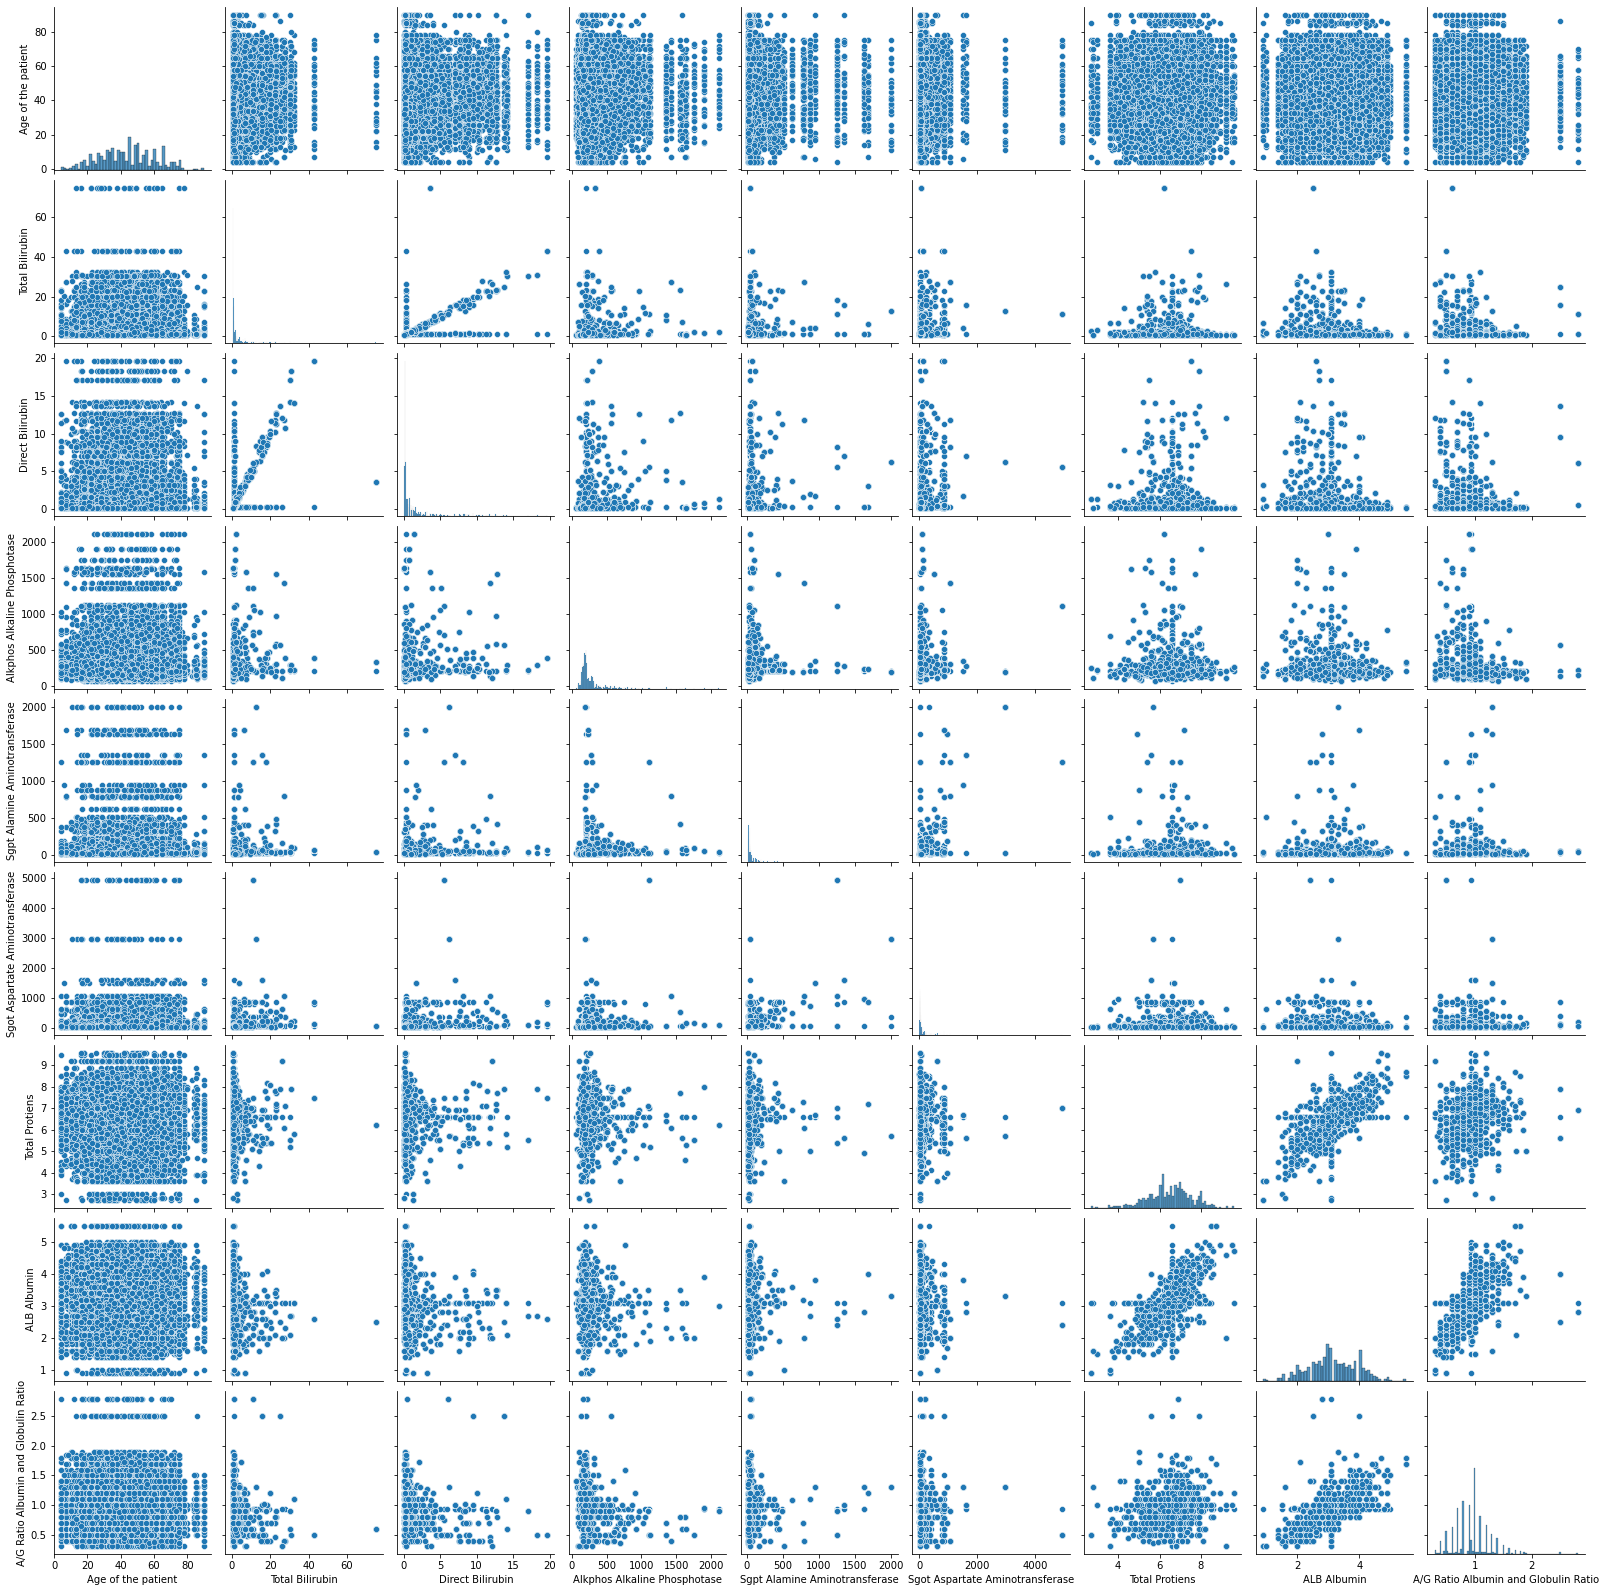

In [27]:
sns.pairplot(data.drop(columns = ['Result','Gender of the patient'],axis=1))
plt.show()

From above pair plot it is clear that there may exists linear relationship among many independent variables. Let's find out the details with correlation matrix

In [214]:
data.drop(columns = ['Result','Gender of the patient'],axis=1).corr()
# multicollinearity exists in the data

Age of the patient  Total Bilirubin  \
Age of the patient                              1.000000        -0.003854   
Total Bilirubin                                -0.003854         1.000000   
Direct Bilirubin                               -0.004568         0.884007   
Alkphos Alkaline Phosphotase                    0.000868         0.198085   
Sgpt Alamine Aminotransferase                   0.005956         0.205167   
Sgot Aspartate Aminotransferase                 0.006246         0.244579   
Total Protiens                                 -0.009365        -0.000669   
ALB Albumin                                    -0.010387        -0.219384   
A/G Ratio Albumin and Globulin Ratio           -0.009535        -0.194955   

                                      Direct Bilirubin  \
Age of the patient                           -0.004568   
Total Bilirubin                               0.884007   
Direct Bilirubin                              1.000000   
Alkphos Alkaline Phosphotase                  0.216749   
Sgpt Alamine Aminotransferase                 0.217222   
Sgot Aspartate Aminotransferase               0.255689   
Total Protiens                                0.001673   
ALB Albumin                                  -0.225039   
A/G Ratio Albumin and Globulin Ratio         -0.186220   

                                      Alkphos Alkaline Phosphotase  \
Age of the patient                                        0.000868   
Total Bilirubin                                           0.198085   
Direct Bilirubin                                          0.216749   
Alkphos Alkaline Phosphotase                              1.000000   
Sgpt Alamine Aminotransferase                             0.124814   
Sgot Aspartate Aminotransferase                           0.158450   
Total Protiens                                           -0.023885   
ALB Albumin                                              -0.159935   
A/G Ratio Albumin and Globulin Ratio                     -0.226370   

                                      Sgpt Alamine Aminotransferase  \
Age of the patient                                         0.005956   
Total Bilirubin                                            0.205167   
Direct Bilirubin                                           0.217222   
Alkphos Alkaline Phosphotase                               0.124814   
Sgpt Alamine Aminotransferase                              1.000000   
Sgot Aspartate Aminotransferase                            0.755545   
Total Protiens                                            -0.038683   
ALB Albumin                                               -0.025867   
A/G Ratio Albumin and Globulin Ratio                      -0.003727   

                                      Sgot Aspartate Aminotransferase  \
Age of the patient                                           0.006246   
Total Bilirubin                                              0.244579   
Direct Bilirubin                                             0.255689   
Alkphos Alkaline Phosphotase                                 0.158450   
Sgpt Alamine Aminotransferase                                0.755545   
Sgot Aspartate Aminotransferase                              1.000000   
Total Protiens                                              -0.025120   
ALB Albumin                                                 -0.083381   
A/G Ratio Albumin and Globulin Ratio                        -0.066896   

                                      Total Protiens  ALB Albumin  \
Age of the patient                         -0.009365    -0.010387   
Total Bilirubin                            -0.000669    -0.219384   
Direct Bilirubin                            0.001673    -0.225039   
Alkphos Alkaline Phosphotase               -0.023885    -0.159935   
Sgpt Alamine Aminotransferase              -0.038683    -0.025867   
Sgot Aspartate Aminotransferase            -0.025120    -0.083381   
Total Protiens                              1.000000     0.7

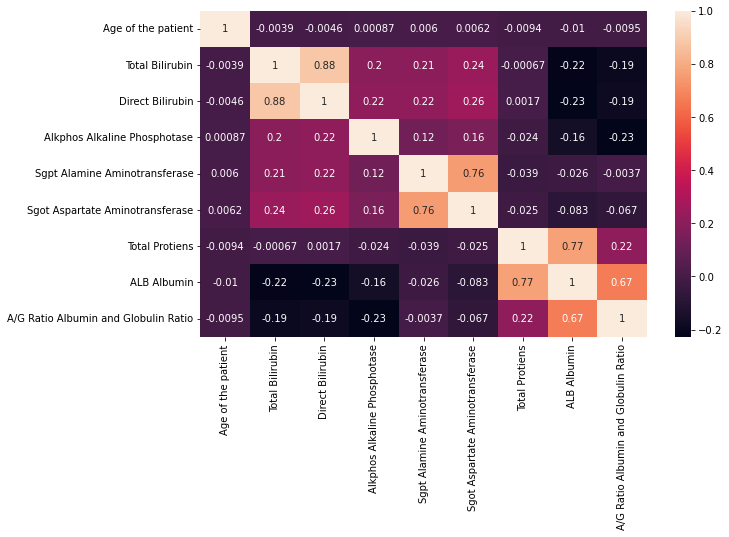

In [215]:
plt.figure(figsize=(10,6))
sns.heatmap(data.drop(columns = ['Result','Gender of the patient'],axis=1).corr(),annot=True)
plt.show()

The multicollinearity exists in the data, for example Albumin is correlated with Total Proteins, similarly 

SGPT and SGOT values are highly correlated with positive correlation of 0.76, 

Direct Bilirubin is highly correlated with Total Blirubin 0.88,

ALB is correlated with A/G Ratio

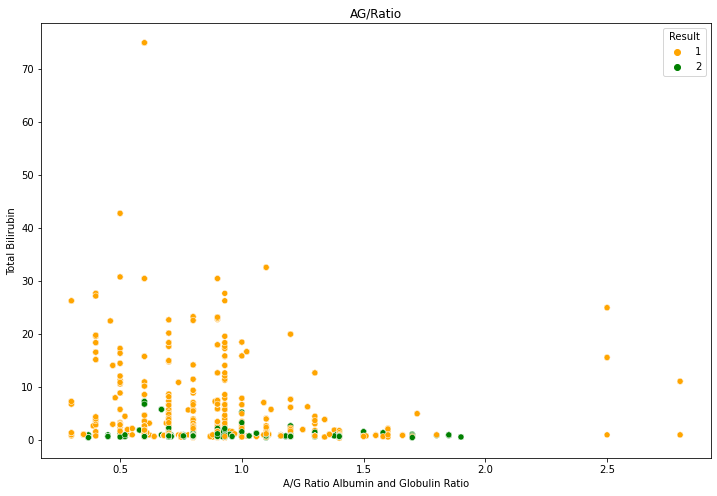

In [216]:
plt.figure(figsize=(12,8)) # balance
plt.title('AG/Ratio')
my_colors = ["orange", "green"]

sns.scatterplot(x=data['A/G Ratio Albumin and Globulin Ratio'],y=data['Total Bilirubin'], hue=data['Result']
               ,palette= my_colors)
sns.color_palette(sns.set_palette("Paired"))
plt.show()

Scatter plots between Bilirubin and A/G ration shows that when the value of Bilirubin is high there is very high chances
that person may suffers from liver ailments. 

The data shows when the value of A?G ratio is beyond 2 several patients suffers from liver diseases

There data points of AG/ratio lying between 0.5 and 2 contains mix cases of patients and did not provide significant information
to segregate liver and non liver ailments patients

In [32]:
fig = px.scatter_3d(data, x='Total Bilirubin', y='Alkphos Alkaline Phosphotase', z='A/G Ratio Albumin and Globulin Ratio',
              color='Result',
                   title='Scatter plots for A/G ratio, AAP, Total Bilirubin')

fig.show()

<Figure size 720x576 with 0 Axes>

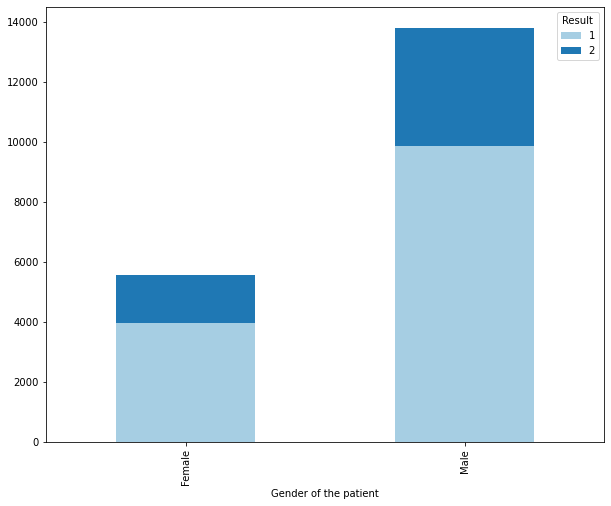

In [228]:

pd.crosstab(data['Gender of the patient'],data['Result']).plot(kind ='bar',stacked=True,figsize=(10,8))
plt.show()

# Model Building

In [35]:
# vectorization of categorical variables
OHencoder = OneHotEncoder(sparse=False)
X_one_hot_encoder = OHencoder.fit_transform(data[['Gender of the patient']])
df_one_hot_encoder = pd.DataFrame(X_one_hot_encoder, columns=OHencoder.get_feature_names_out())

# scaling the numerical variables
num_list = list(data.select_dtypes(exclude=object).drop(['Result'],axis=1).columns)
Standard_Scaler = StandardScaler()
X_array= Standard_Scaler.fit_transform(data[num_list])
# creating data frame for the transformed numerical columns
X_scaled_num = pd.DataFrame(X_array,columns=Standard_Scaler.get_feature_names_out() )
df_merged = pd.merge(X_scaled_num,df_one_hot_encoder,left_index=True, right_index=True)
df_merged.head()

Age of the patient  Total Bilirubin  Direct Bilirubin  \
0            1.287819        -0.422356         -0.488751   
1            1.105494         1.267620          1.417009   
2            1.105494         0.671158          0.922923   
3            0.862394        -0.372651         -0.382875   
4            1.713244         0.107832          0.181795   

   Alkphos Alkaline Phosphotase  Sgpt Alamine Aminotransferase  \
0                     -0.421797                      -0.354642   
1                      1.748866                      -0.086643   
2                      0.862794                      -0.108976   
3                     -0.442995                      -0.365808   
4                     -0.387880                      -0.293225   

   Sgot Aspartate Aminotransferase  Total Protiens  ALB Albumin  \
0                        -0.330845        0.281269     0.203581   
1                        -0.034009        0.929662     0.076208   
2                        -0.149847        0.466524     0.203581   
3                        -0.323605        0.281269     0.330954   
4                        -0.182427        0.744407    -0.942775   

   A/G Ratio Albumin and Globulin Ratio  Gender of the patient_Female  \
0                             -0.143007                           1.0   
1                             -0.645554                           0.0   
2                             -0.174416                           0.0   
3                              0.171085                           0.0   
4                             -1.713467                           0.0   

   Gender of the patient_Male  
0                         0.0  
1                         1.0  
2                         1.0  
3                         1.0  
4                         1.0

In [36]:
X= df_merged
X = sm.add_constant(X)
y = data['Result'].replace({1:1,2:0}) # 1 replaced by 1 and 2 by 0, now 0 means no liver disese, 1 means there is liver disease

In [37]:
y.value_counts()/len(data)*100
# 71% data represetns people with liver disease and 28 % with no liver disease, there is a imbalance in the data
but 

1    71.308344
0    28.691656
Name: Result, dtype: float64

### Splitting the data

In [229]:
X_train, X_further, y_train, y_further = train_test_split(
...     X, y, test_size=0.2, random_state=10)
X_val, X_test, y_val, y_test = train_test_split(
...     X_further, y_further, test_size=0.5, random_state=10)
# splitting the data into train, test and validation according to industrial practices

In [230]:
print("Train shape")
print(X_train.shape, y_train.shape)
print("Test shape")
print(X_test.shape, y_test.shape)
print("validation shape")
print(X_val.shape, y_val.shape)

Train shape
(15494, 12) (15494,)
Test shape
(1937, 12) (1937,)
validation shape
(1937, 12) (1937,)


In [231]:
# percentage of target variables in the train, test and validation
print('train \n ',y_train.value_counts()/len(y_train)*100)
print('\ntest \n',y_test.value_counts()/len(y_test)*100)
print('\nval\n',y_val.value_counts()/len(y_val)*100)

train 
  1    71.324384
0    28.675616
Name: Result, dtype: float64

test 
 1    71.192566
0    28.807434
Name: Result, dtype: float64

val
 1    71.295818
0    28.704182
Name: Result, dtype: float64


In [100]:
stats_X = X_train # full model 
logreg = sm.Logit(y_train.values.reshape(-1,1), stats_X, check_rank=True).fit()
print(logreg.summary())
print(logreg.aic)

Optimization terminated successfully.
         Current function value: 0.498221
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                15494
Model:                          Logit   Df Residuals:                    15483
Method:                           MLE   Df Model:                           10
Date:                Mon, 17 Apr 2023   Pseudo R-squ.:                  0.1686
Time:                        13:32:42   Log-Likelihood:                -7719.4
converged:                       True   LL-Null:                       -9284.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    1.2923   7.62e+

From Wald's test it is lcear that gender age and total Bilirubin and direct bilirubin have p value more than 0.05
these variables appear insignificant

The total Bilirubin and direct bilirubin are highly correlated and support multicollinearity in the data
let's remove Total Bilirubin to make the model better

In [232]:
stats_X = X_train.drop(columns = ['Gender of the patient_Female',
                                 'Age of the patient',
                                 'Gender of the patient_Male',
                                 'Total Bilirubin'] # removing significant variable
                      , axis =1)
logreg = sm.Logit(y_train.values.reshape(-1,1), stats_X, check_rank=True).fit()
print(logreg.summary())
print(logreg.aic)

Optimization terminated successfully.
         Current function value: 0.498326
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                15494
Model:                          Logit   Df Residuals:                    15486
Method:                           MLE   Df Model:                            7
Date:                Mon, 17 Apr 2023   Pseudo R-squ.:                  0.1684
Time:                        21:22:36   Log-Likelihood:                -7721.1
converged:                       True   LL-Null:                       -9284.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    1.9302      0.0

In [233]:
def ApplyModel(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    print('Model Performance')
    print('test or val score',model.score(X_val, y_val))
    print('train score',model.score(X_train, y_train))

    print('test or val  classification \n',metrics.classification_report(y_val,model.predict(X_val),digits=5))
    print('train classification \n',metrics.classification_report(y_train, model.predict(X_train),digits=5))
    print("Confusion Matrix \n", metrics.confusion_matrix(y_val,model.predict(X_val)))

In [239]:
list_model = [('Decision Tree',DecisionTreeClassifier()), ("Logistic Regression",LogisticRegression())
              , ("KNN",KNeighborsClassifier()),
             ("Support Vector Machine",SVC())
              , ("Random Forest",RandomForestClassifier())
              , ("Ada Boost",AdaBoostClassifier()),
             ( "Gradient Boost",GradientBoostingClassifier())]
for model in list_model:
    print(f"Model Evaluation name: {model[0]}")
    ApplyModel(model[1],X_train, y_train, X_test, y_test)

Model Evaluation name: Decision Tree
Model Performance
test or val score 0.9891584925141972
train score 0.9999354588873112
test or val  classification 
               precision    recall  f1-score   support

           0    0.98378   0.97849   0.98113       558
           1    0.99132   0.99347   0.99239      1379

    accuracy                        0.98916      1937
   macro avg    0.98755   0.98598   0.98676      1937
weighted avg    0.98915   0.98916   0.98915      1937

train classification 
               precision    recall  f1-score   support

           0    1.00000   0.99977   0.99989      4443
           1    0.99991   1.00000   0.99995     11051

    accuracy                        0.99994     15494
   macro avg    0.99995   0.99989   0.99992     15494
weighted avg    0.99994   0.99994   0.99994     15494

Confusion Matrix 
 [[ 546   12]
 [   9 1370]]
Model Evaluation name: Logistic Regression
Model Performance
test or val score 0.7279297883324729
train score 0.723441332128

In [304]:
# Final algorithms
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print('Model')
print('test score',model.score(X_test, y_test))
print('train score',model.score(X_train, y_train))

print('test classification',metrics.classification_report(y_test,model.predict(X_test),digits=5))
print('train classification',metrics.classification_report(y_train, model.predict(X_train),digits=5))

Model
test score 0.9891584925141972
train score 0.9999354588873112
test classification               precision    recall  f1-score   support

           0    0.98205   0.98029   0.98117       558
           1    0.99203   0.99275   0.99239      1379

    accuracy                        0.98916      1937
   macro avg    0.98704   0.98652   0.98678      1937
weighted avg    0.98915   0.98916   0.98916      1937

train classification               precision    recall  f1-score   support

           0    1.00000   0.99977   0.99989      4443
           1    0.99991   1.00000   0.99995     11051

    accuracy                        0.99994     15494
   macro avg    0.99995   0.99989   0.99992     15494
weighted avg    0.99994   0.99994   0.99994     15494



In [246]:
from sklearn import tree

In [253]:
a =tree.export_text(model)
print(a)

|--- feature_2 <= -0.26
|   |--- feature_4 <= -0.32
|   |   |--- feature_5 <= 0.07
|   |   |   |--- feature_4 <= -0.65
|   |   |   |   |--- feature_5 <= -0.32
|   |   |   |   |   |--- feature_5 <= -0.35
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_5 >  -0.35
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  -0.32
|   |   |   |   |   |--- feature_7 <= 1.62
|   |   |   |   |   |   |--- feature_6 <= -0.33
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_6 >  -0.33
|   |   |   |   |   |   |   |--- feature_7 <= -2.22
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_7 >  -2.22
|   |   |   |   |   |   |   |   |--- feature_2 <= -0.40
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_2 >  -0.40
|   |   |   |   |   |   |   |   |   |--- feature_2 <= -0.38
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   | 

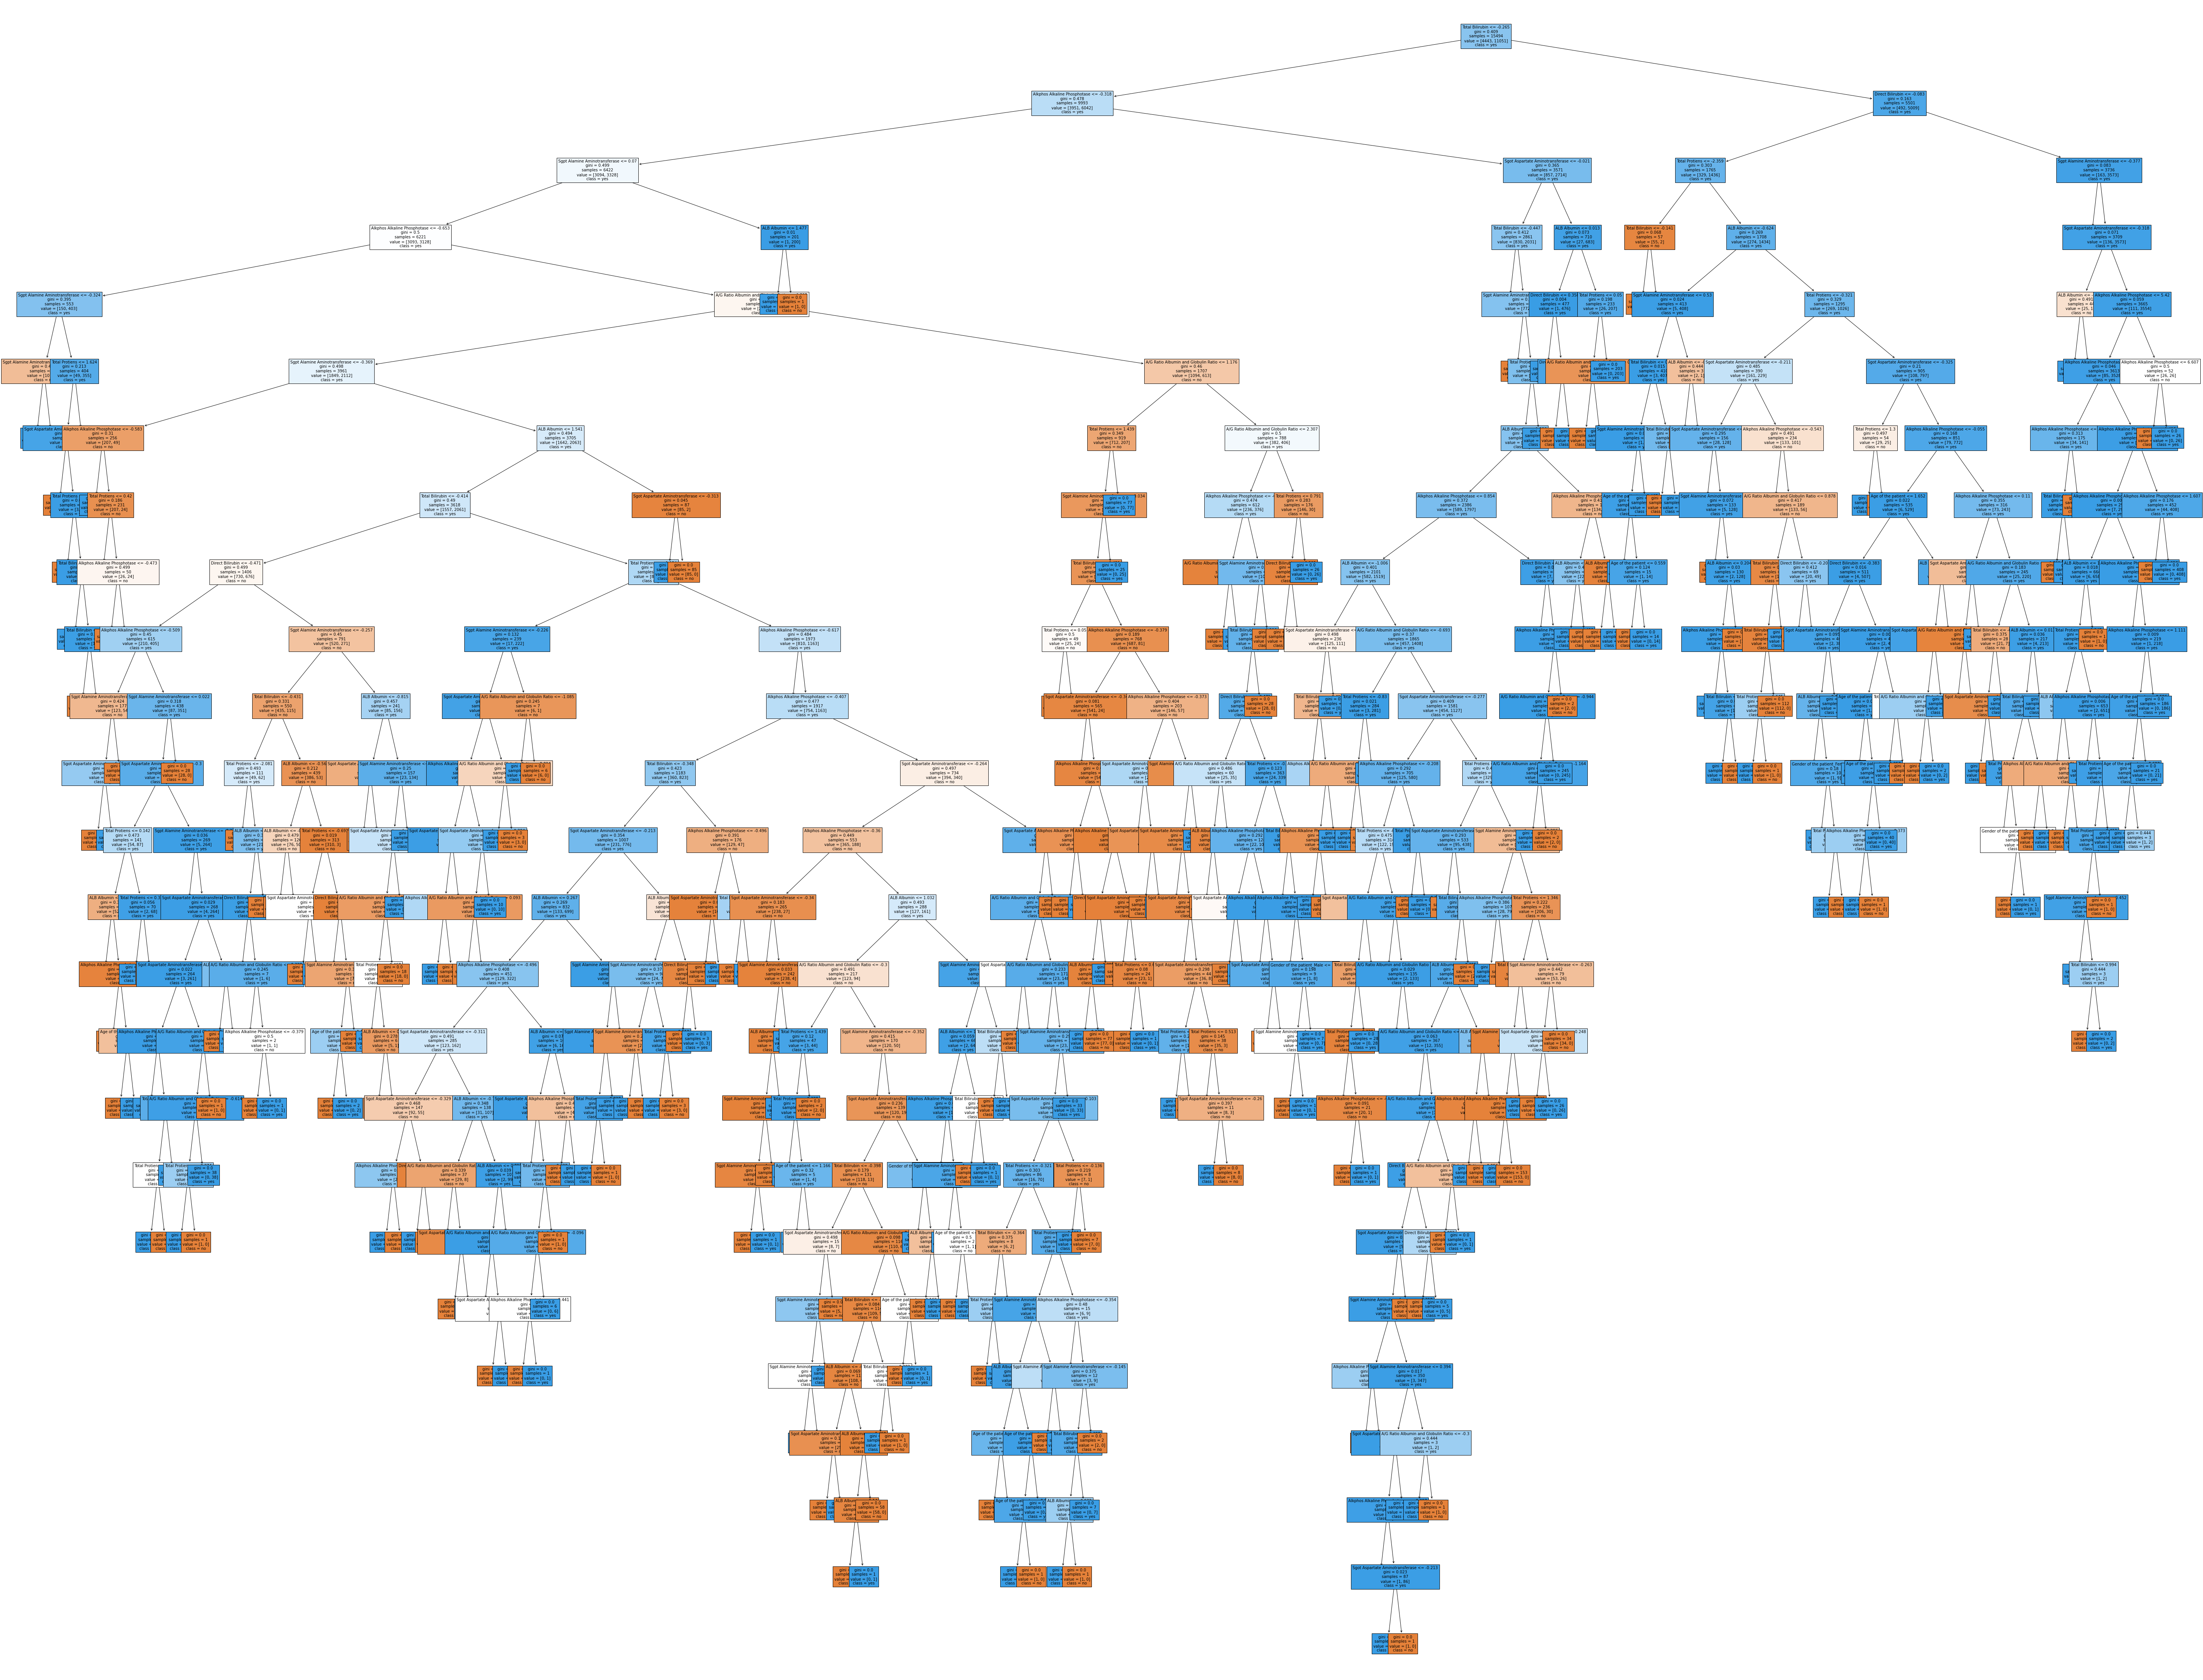

In [267]:
fig = plt.figure(figsize=(100,80))
_ = tree.plot_tree(model,
                   feature_names=X_train.columns,  
                   class_names=['no','yes'],
                   filled=True,
                  fontsize=10)


In [268]:
model.feature_importances_

array([0.00000000e+00, 2.10201944e-03, 1.79088966e-01, 3.01854328e-02,
       2.27754552e-01, 1.29348935e-01, 1.37902543e-01, 1.24460979e-01,
       1.01762716e-01, 6.67766258e-02, 4.94485586e-04, 1.22744649e-04])

In [269]:
model.feature_names_in_

array(['const', 'Age of the patient', 'Total Bilirubin',
       'Direct Bilirubin', 'Alkphos Alkaline Phosphotase',
       'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', 'ALB Albumin',
       'A/G Ratio Albumin and Globulin Ratio',
       'Gender of the patient_Female', 'Gender of the patient_Male'],
      dtype=object)

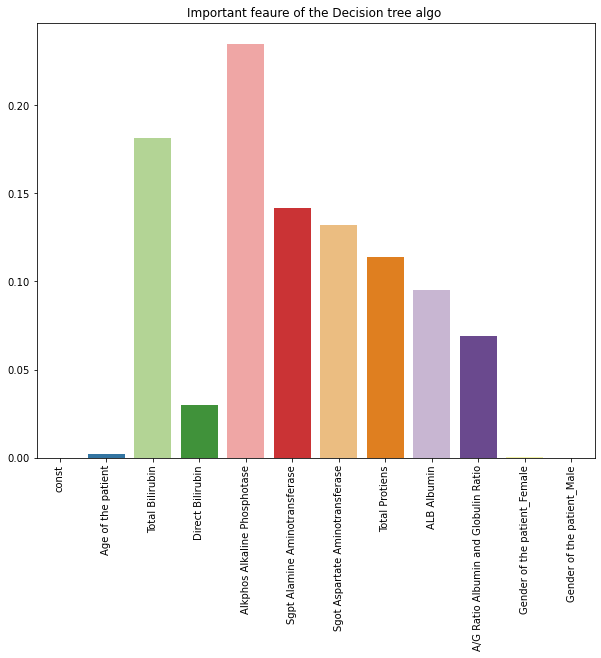

In [307]:
plt.figure(figsize=(10,8))
sns.barplot(y = model.feature_importances_, x= model.feature_names_in_)
plt.title("Important feaure of the Decision tree algo ")
plt.xticks(rotation=90)
plt.show()

In [273]:
X_train.columns

Index(['const', 'Age of the patient', 'Total Bilirubin', 'Direct Bilirubin',
       'Alkphos Alkaline Phosphotase', 'Sgpt Alamine Aminotransferase',
       'Sgot Aspartate Aminotransferase', 'Total Protiens', 'ALB Albumin',
       'A/G Ratio Albumin and Globulin Ratio', 'Gender of the patient_Female',
       'Gender of the patient_Male'],
      dtype='object')

In [284]:
significant_list = ['Age of the patient', 'Total Bilirubin', 'Direct Bilirubin',
       'Alkphos Alkaline Phosphotase', 'Sgpt Alamine Aminotransferase',
       'Sgot Aspartate Aminotransferase', 'Total Protiens', 'ALB Albumin',
       'A/G Ratio Albumin and Globulin Ratio']
# removing variables that are not important in the decision tree algorithm

In [291]:
# Final algorithm
#with only significant variables

model = DecisionTreeClassifier()
model =model.fit(X_train[significant_list], y_train)
print('Model')
print('test score',model.score(X_test[significant_list], y_test))
print('train score',model.score(X_train[significant_list], y_train))

print('test classification',metrics.classification_report(y_test,model.predict(X_test[significant_list]),digits=5))
print('train classification',metrics.classification_report(y_train, model.predict(X_train[significant_list]),digits=5))

Model
test score 0.9901910170366546
train score 0.9999354588873112
test classification               precision    recall  f1-score   support

           0    0.98384   0.98208   0.98296       558
           1    0.99275   0.99347   0.99311      1379

    accuracy                        0.99019      1937
   macro avg    0.98830   0.98778   0.98804      1937
weighted avg    0.99019   0.99019   0.99019      1937

train classification               precision    recall  f1-score   support

           0    1.00000   0.99977   0.99989      4443
           1    0.99991   1.00000   0.99995     11051

    accuracy                        0.99994     15494
   macro avg    0.99995   0.99989   0.99992     15494
weighted avg    0.99994   0.99994   0.99994     15494



In [299]:
#import pickle

In [293]:
#pickle.dump(model, open('final_Decision_tree', 'wb'))

In [300]:
#model_loaded =pickle.load(open('final_Decision_tree','rb'))

# Conclusion

The model so built provides accuray of 99% to predict whether patient is suffering from liver ailments

It was found that age and gender does not impacts the liver ailments of person using hypothesis test

Non parametric algorithm like Decision tree performs better to build the model as the data was not following normal distribution

The model is ready for the deployment in the production